In [32]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import mglearn
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 나눔 폰트를 사용합니다.
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 1.결정 트리 만들기

In [8]:
# mglearn.plots.plot_tree_progressive()

()

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 적재
cancer = load_breast_cancer()

# 훈련셋, 테스트셋 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state = 0)

# 모델 선언
DTC = DecisionTreeClassifier(random_state=0)

# 모델 학습
DTC.fit(X_train, y_train)

# 모델 평가
print("train score : " , DTC.score(X_train, y_train))
print("test score : " , DTC.score(X_test, y_test), "\n")
# 과대 적합임을 알 수 있다.

# 모델 보정
# DTC2 = DecisionTreeClassifier(max_depth=4, random_state=0)
DTC2 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=0)
DTC2.fit(X_train, y_train)
print("DTC2 train score : " , DTC2.score(X_train, y_train))
print("DTC2 test score : " , DTC2.score(X_test, y_test), "\n")

train score :  1.0
test score :  0.8811188811188811 

DTC2 train score :  0.9647887323943662
DTC2 test score :  0.9370629370629371 



In [44]:
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
# import graphviz


# export_graphviz(DTC2,
#                 out_file='tree.dot',
#                 class_names=['악성','양성'],
#                feature_names=cancer.feature_names,
#                impurity=False,
#                filled=True)

# with open('tree.dot', encoding = "utf-8") as f :
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))


In [57]:
importance = list(DTC2.feature_importances_)
# 사용하고 있는 feature만 나옴
# 어떤게 중요한지 회귀분석을 통해 파악할 수도 있지만, 이진분류이므로 적용이 안된다.
importance

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8108414616561354,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05733052376079161,
 0.0,
 0.13182801458307294,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

<BarContainer object of 30 artists>

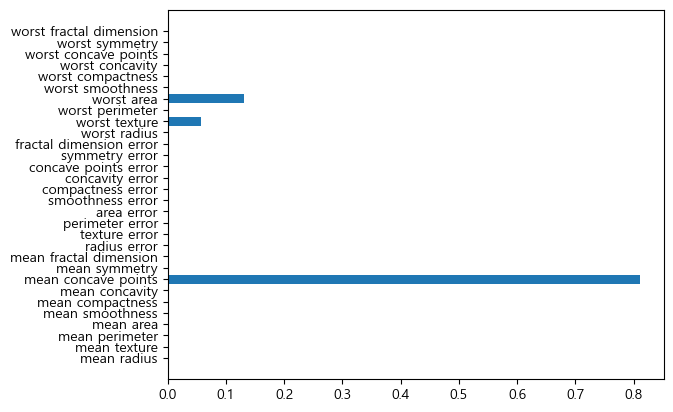

In [69]:
# cancer['feature_names']

plt.barh(cancer['feature_names'], importance)